In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [58]:
df = pd.read_csv('myDataFile.csv',header=None)

In [ ]:
print(df)

In [59]:
x = df.iloc[:,:9]
y = df.iloc[:,9:10]

In [42]:
# x=x.iloc[0:10].values
# y=y.iloc[0:10]
print(x)
print(y)

             0         1         2         3  ...       5        6       7        8
0     -0.19059 -1.902800  15.29500 -0.500090  ...  60.002  0.99736  3.3040  0.98770
1     -1.09010 -3.296400  20.28600 -1.558500  ...  59.984  0.99965  1.3854  0.96180
2      0.14129  1.129000  -3.60000 -0.669790  ...  59.987  0.99924  1.1090  0.95073
3      0.43103  1.185200   0.14178  1.891200  ...  59.994  0.99926  1.2978  0.98215
4      0.72313 -0.069471   1.03700  0.457150  ...  60.006  0.99938  1.2777  0.98971
...        ...       ...       ...       ...  ...     ...      ...     ...      ...
10995 -1.52030  3.099100   2.23730  7.702000  ...  59.985  0.99572  1.0750  0.96373
10996  0.77303 -1.691700  -3.63550  0.735900  ...  59.997  0.99531  1.3409  0.97557
10997  0.18220 -0.736770  -0.37476 -0.611240  ...  60.000  0.99527  1.1978  0.96542
10998 -0.38011  0.055299   1.01850  0.421260  ...  59.994  0.99538  1.1210  0.97251
10999 -0.11994  2.264600   0.66754 -0.030873  ...  59.992  0.99546  1.1138  

In [60]:
######################################################################################################
# Functions
######################################################################################################
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(0,len(X) - time_steps,time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps].values)
    return np.array(Xs), np.array(ys)

def create_sub_dataset(X, y, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)

In [61]:
X,Y = create_dataset(x,y,10)
print(X.shape)

(1099, 10, 9)
[[[-1.9059e-01 -1.9028e+00  1.5295e+01 ...  9.9736e-01  3.3040e+00
    9.8770e-01]
  [-1.0901e+00 -3.2964e+00  2.0286e+01 ...  9.9965e-01  1.3854e+00
    9.6180e-01]
  [ 1.4129e-01  1.1290e+00 -3.6000e+00 ...  9.9924e-01  1.1090e+00
    9.5073e-01]
  ...
  [-6.8260e-02 -4.6969e+00  3.4488e+00 ...  9.9931e-01  1.1664e+00
    9.4203e-01]
  [-1.0136e-01  2.7443e+00  1.1135e-01 ...  9.9932e-01  1.2963e+00
    9.6978e-01]
  [ 3.7899e-01  1.8249e+00  2.7467e-01 ...  9.9936e-01  1.2043e+00
    9.7897e-01]]

 [[-2.5916e-02  3.4562e+00  1.9622e+01 ...  9.9757e-01  3.8161e+00
    9.9051e-01]
  [-1.1129e+00 -2.2936e+00  2.4837e+01 ...  1.0004e+00  1.5330e+00
    9.8674e-01]
  [ 2.1980e-01 -4.0292e+00 -5.3422e+00 ...  9.9978e-01  8.5241e-01
    9.9120e-01]
  ...
  [-3.6056e-01 -5.8827e-01  1.5013e+00 ...  1.0000e+00  1.2191e+00
    9.5773e-01]
  [ 2.0256e-01  6.6196e-01  7.1341e-01 ...  1.0001e+00  1.3463e+00
    9.4294e-01]
  [ 7.1773e-02  7.1578e-01 -7.4109e-01 ...  9.9999e-01  9.5

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
######################################################################################################
# Preprocessing
######################################################################################################
# train test splitting
train_size = int(len(X) * 0.70)
X_train, X_test = X[0:train_size], X[train_size:len(x)]
y_train, y_test = Y[0:train_size], Y[train_size:len(x)]

In [76]:
TIME_STEPS = 10

print(X_train.shape)


(769, 10, 9)


In [82]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

# convert integers to dummy variables (i.e. one hot encoded)
one_hot_y_train = np_utils.to_categorical(encoded_y_train)
one_hot_y_test = np_utils.to_categorical(encoded_y_test)
print(one_hot_y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
######################################################################################################
# Model building
######################################################################################################

model = keras.Sequential()
model.add(keras.layers.LSTM(100,input_shape=(TIME_STEPS,X_train.shape[2])))
# model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

history = model.fit(X_train,one_hot_y_train, validation_data=(X_test,one_hot_y_test), epochs=300, batch_size=10000,shuffle = True,callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
# history = model.fit(X_train,one_hot_y_train, validation_data=(X_test,one_hot_y_test), epochs=50, batch_size=64,shuffle = False)

# predictions
test_pred = model.predict(X_test)
predicted = np.argmax(test_pred, axis=1)
print(predicted.shape)
print(predicted)

Epoch 1/300
1/1 [==============================] - 1s 738ms/step - loss: 2.4268 - val_loss: 2.3474
Epoch 2/300
1/1 [==============================] - 0s 75ms/step - loss: 2.3503 - val_loss: 2.2815
Epoch 3/300
1/1 [==============================] - 0s 80ms/step - loss: 2.2866 - val_loss: 2.2200
Epoch 4/300
1/1 [==============================] - 0s 81ms/step - loss: 2.2263 - val_loss: 2.1606
Epoch 5/300
1/1 [==============================] - 0s 82ms/step - loss: 2.1666 - val_loss: 2.0984
Epoch 6/300
1/1 [==============================] - 0s 77ms/step - loss: 2.1023 - val_loss: 2.0297
Epoch 7/300
1/1 [==============================] - 0s 76ms/step - loss: 2.0351 - val_loss: 1.9542
Epoch 8/300
1/1 [==============================] - 0s 76ms/step - loss: 1.9563 - val_loss: 1.8727
Epoch 9/300
1/1 [==============================] - 0s 72ms/step - loss: 1.8761 - val_loss: 1.7857
Epoch 10/300
1/1 [==============================] - 0s 72ms/step - loss: 1.7861 - val_loss: 1.6937
Epoch 11/300
1/1 [

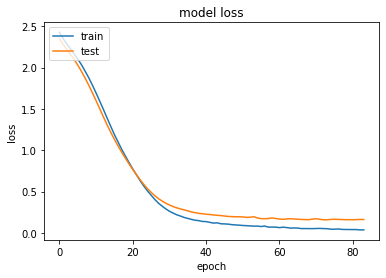

In [142]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [143]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted))

0.9636363636363636
